In [ ]:
# !pip install adlfs
# !pip install ndpyramid
# !pip install pyresample
# !pip install xesmf

In [1]:

import adlfs
import xarray as xr
import pathlib
import zarr
import rioxarray as rxr
import geopandas as gpd
import earthaccess
import ndpyramid
import datatree
import odc.geo
import odc.stac
import matplotlib.pyplot as plt
import hvplot.xarray

In [2]:
bbox_gdf = gpd.read_file('../snowmelt-timing-2024/data/grand_mesa.geojson')

In [3]:
sas_token = pathlib.Path('sas_token.txt').read_text()
mask_store = adlfs.AzureBlobFileSystem(account_name="snowmelt", credential=sas_token).get_mapper("snowmelt/snow_mask_v2/global_modis_snow_mask.zarr")
output_store = adlfs.AzureBlobFileSystem(account_name="snowmelt", credential=sas_token).get_mapper("snowmelt/snow_mask_v2/pyramid_global_modis_snow_mask.zarr")

processed_tiles = zarr.open(mask_store).attrs['processed_tiles']

In [4]:
#v3 h11
# v=3
# h=10
# y_slice = slice(v * 2400, (v + 1) * 2400)
# x_slice = slice(h * 2400, (h + 1) * 2400)

In [5]:
#import rasterio
#crs = rasterio.CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [6]:
seasonal_snow_mask_ds = xr.open_zarr(mask_store,decode_coords='all',consolidated=True)#.isel(x=x_slice,y=y_slice) #.rio.write_crs(crs)#.drop_vars('spatial_ref') #.isel(x=x_slice,y=y_slice) 
seasonal_snow_mask_ds

<xarray.Dataset> Size: 224GB
Dimensions:               (water_year: 10, y: 43200, x: 86400)
Coordinates:
    spatial_ref           int64 8B ...
  * water_year            (water_year) int64 80B 2015 2016 2017 ... 2023 2024
  * x                     (x) float64 691kB -2.001e+07 -2.001e+07 ... 2.001e+07
  * y                     (y) float64 346kB 1.001e+07 1.001e+07 ... -1.001e+07
Data variables:
    SAD_DOWY              (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
    SDD_DOWY              (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
    max_consec_snow_days  (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
Attributes:
    processed_tiles:  ['h15_v17', 'h16_v17', 'h17_v17', 'h18_v17', 'h19_v17',...

In [ ]:
43200/2

In [ ]:
seasonal_snow_mask_ds=seasonal_snow_mask_ds.isel(y=slice(0,21600))
seasonal_snow_mask_ds

In [ ]:
#seasonal_snow_mask_ds['max_consec_snow_days'].rio.set_nodata(0,inplace=True)

In [7]:
v=0
h=8
#h=12
#v=13
y_slice = slice(v * 2400, (v + 15) * 2400)
x_slice = slice(h * 2400, (h + 6) * 2400)

max_consec_snow_days_da = seasonal_snow_mask_ds['max_consec_snow_days'].isel(x=x_slice,y=y_slice).compute()
max_consec_snow_days_da

<xarray.DataArray 'max_consec_snow_days' (water_year: 10, y: 36000, x: 14400)> Size: 10GB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)
Coordinates:
    spatial_ref  int64 8B 0
  * water_year   (water_year) int64 80B 2015 2016 2017 2018 ... 2022 2023 2024
  * x            (x) float64 115kB -1.112e+07 -1.112e+07 ... -4.448e+06
  * y            (y) float64 288kB 1.001e+07 1.001e+07 ... -6.671e+06 -6.671e+06

In [8]:
#max_consec_snow_days_da.hvplot(groupby='water_year',clim=(0,365))

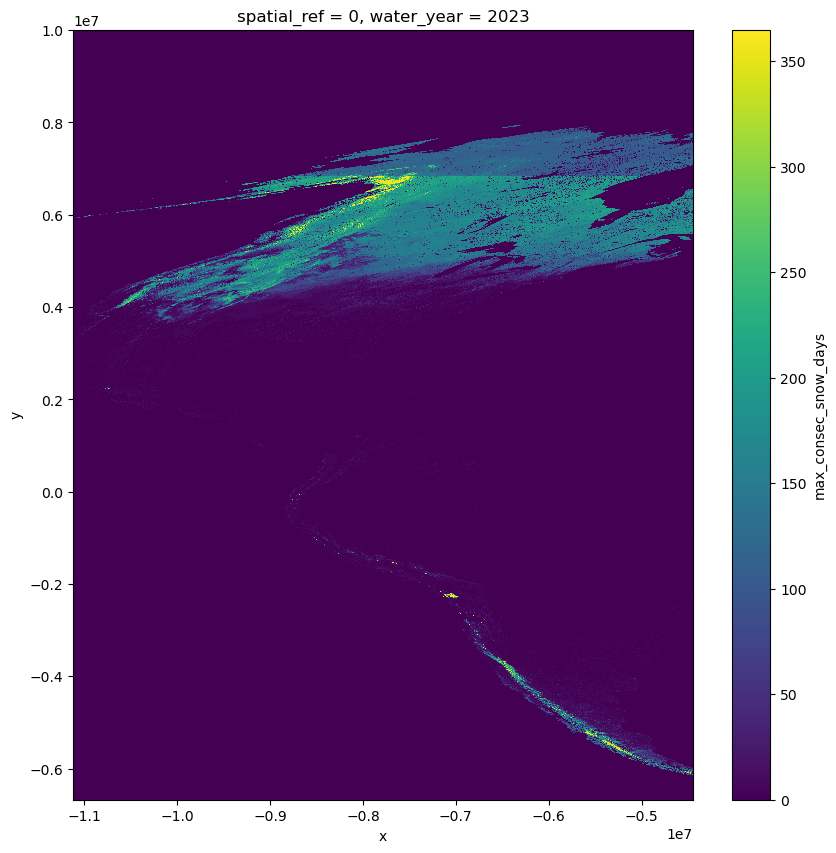

In [9]:
f,ax=plt.subplots(figsize=(10,10))
max_consec_snow_days_da.sel(water_year=2023).plot.imshow(vmin=0,vmax=365)#.sel(water_year=2020).plot.imshow(ax=ax,vmin=0,vmax=365).odc.explore(vmin=0,vmax=365)

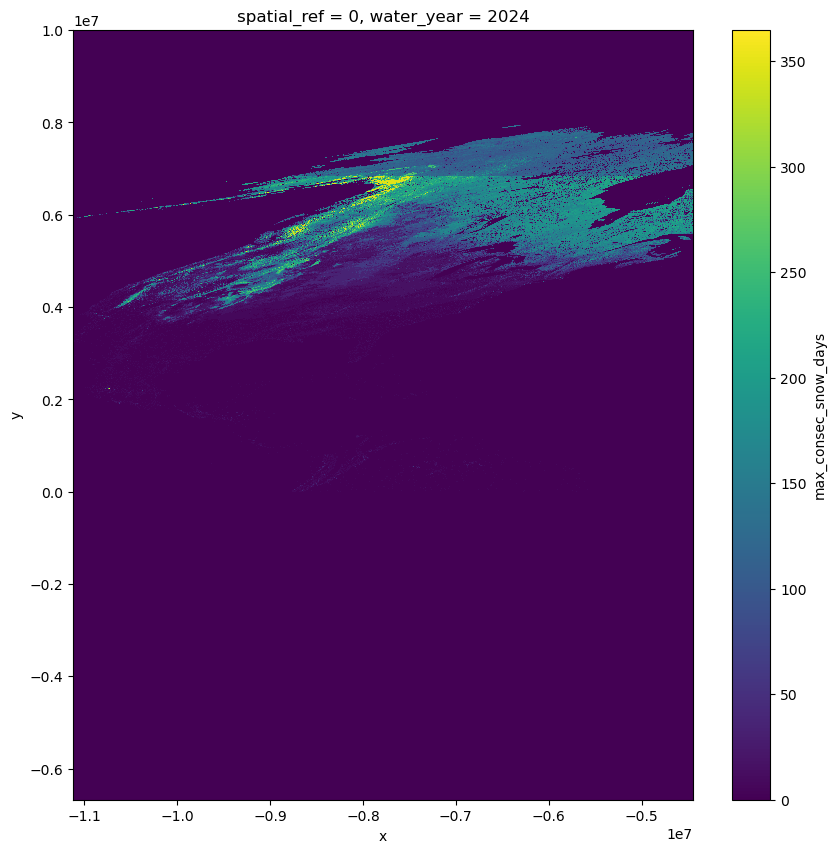

In [10]:
f,ax=plt.subplots(figsize=(10,10))
max_consec_snow_days_da.sel(water_year=2024).plot.imshow(vmin=0,vmax=365)#.sel(water_year=2020).plot.imshow(ax=ax,vmin=0,vmax=365).odc.explore(vmin=0,vmax=365)

In [ ]:
#seasonal_snow_mask_slice_ds = seasonal_snow_mask_ds['max_consec_snow_days'].isel(x=x_slice,y=y_slice).compute()

In [ ]:
#
#seasonal_snow_mask_slice_ds.hvplot(groupby='water_year',clim=(0,365)) # .sel(water_year=2020)

In [ ]:
%%time
# using pyresample https://ndpyramid.readthedocs.io/en/latest/generated/ndpyramid.pyramid_resample.html https://ndpyramid.readthedocs.io/en/latest/examples/pyramid-resample.html https://github.com/carbonplan/ndpyramid/blob/main/ndpyramid/resample.py

levels = 2
resampled_pyramid = ndpyramid.pyramid_resample(seasonal_snow_mask_ds.rename({'water_year':'time'}), levels=levels,pixels_per_tile=512,x='x',y='y',resampling='nearest')

In [ ]:
resampled_pyramid

In [ ]:
resampled_pyramid['1'].ds['max_consec_snow_days']

In [ ]:
resampled_pyramid['1'].ds['max_consec_snow_days'].sel(time=2023).odc.explore(vmin=0,vmax=365)

In [ ]:
%%time
# https://github.com/carbonplan/ndpyramid/blob/main/docs/examples/pyramid-resample.ipynb
resampled_pyramid.to_zarr(output_store, consolidated=True, mode='w')

In [ ]:
# https://github.com/carbonplan/maps/blob/main/demo/pages/index.js

In [ ]:
# using rasterio

# %%time
# levels = 4
# resampled_pyramid = ndpyramid.pyramid_reproject(seasonal_snow_mask_ds, levels=levels,resampling='nearest')
# resampled_pyramid

#resampled_pyramid['3'].ds['max_consec_snow_days'].sel(water_year=2020).odc.explore(vmin=0,vmax=365) #resampled_pyramid.to_zarr(output, consolidated=True, mode='w')


# #earthaccess.login()
# # # search = earthaccess.search_data(
# # #                 short_name="MOD10A1F",
# # #                 cloud_hosted=False,
# # #                 bounding_box=tuple(bbox_gdf.total_bounds),
# # #                 temporal=("2023-10-01","2024-09-30"),
# # #             )
# # #earthaccess.search_data?
# # files = earthaccess.open(search)
# # files

# #xr.open_mfdataset(files)
# !ls -lh /tmp/local_folder/

# temp_download_fp = "/tmp/local_folder"

# files = earthaccess.download(
#     search, temp_download_fp
# ) 

# modis_snow = xr.concat(
#     [
#         rxr.open_rasterio(
#             file, 
#             variable="CGF_NDSI_Snow_Cover", 
#             chunks={}
#         )["CGF_NDSI_Snow_Cover"] for file in files])
